In [3]:
from collections import Counter
from sklearn.datasets import make_classification
import pandas as pd

In [4]:
import warnings


warnings.filterwarnings('ignore')


In [5]:
X,y = make_classification(n_samples = 10000,n_features = 2 , n_clusters_per_class = 1,n_classes = 2,n_redundant=0,
                         weights = [0.99],random_state = 10)

In [6]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

<Axes: xlabel='0', ylabel='1'>

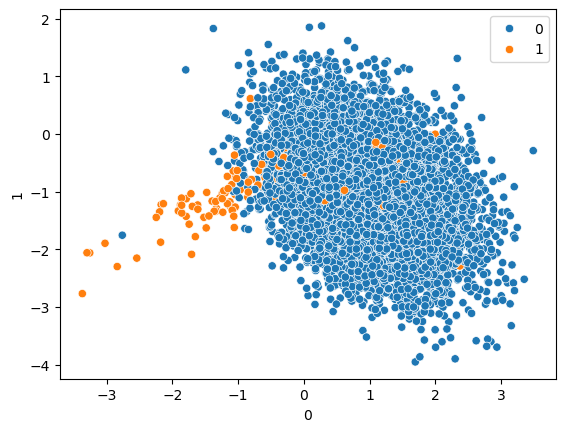

In [7]:
import seaborn as sns
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [9]:
class_weights = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
class_weights # assigning class weights to minority and class_weight = class_weight in logisticregression()

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [10]:
# Fix 1: Increase max_iter to stop ConvergenceWarnings
from sklearn.linear_model import LogisticRegression
tuned_model = LogisticRegression(max_iter=100000, random_state=42)

# Fix 2: Use a list of dictionaries to map valid penalties to valid solvers
params = [
    # Config 1: l1 penalty (supported by liblinear and saga)
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': [0.1, 1, 10, 100, 0.01],
        'class_weight': class_weights
    },
    
    # Config 2: l2 penalty (supported by all solvers)
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C': [0.1, 1, 10, 100, 0.01],
        'class_weight': class_weights
    },
    
    # Config 3: elasticnet (only supported by saga, and requires l1_ratio)
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': [0.1, 1, 10, 100, 0.01],
        'l1_ratio': [0.5], # elasticnet needs this parameter (0.5 = 50% l1, 50% l2)
        'class_weight': class_weights

    }
]

# Now run GridSearchCV with these corrected params
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5)

grid = GridSearchCV(tuned_model, param_grid=params, n_jobs=-1, scoring='accuracy', cv=cv)
grid.fit(X_train, y_train)


KeyboardInterrupt: 